In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorboard
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import sklearn
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,GlobalAveragePooling2D

In [58]:
from keras.models import load_model
model1 = load_model('Model_base.h5')
model2 = load_model('Model_final.h5')

In [59]:
path="test/"
filelist=os.listdir(path)
test_sec = 0
count_sec = [0] * 7
true_sec1 = np.zeros((7,3))
Acc1 = np.zeros((7,3))
pred_len = 50
for folder in filelist:
    test_sec += 1
    print('sec')
    content_list = []
    content_id = os.listdir(path+folder+'/')
    for i in range(pred_len):
        random_content = random.choice(content_id)
        content_list.append(random_content)
 
    for item in content_list:
        count_sec[test_sec-1] += 1
        img=cv2.imread(path+folder+'/'+item)
        img=cv2.resize(img,(48,48))
        img=np.reshape(img,(1,48,48,3))
        img = img / 255
        pred_prob = model2.predict(img)
        for N in range(1,4):
            N_max = np.argsort(pred_prob[0])[-N:]
            if test_sec - 1 in N_max:
                true_sec1[test_sec-1][N-1] += 1

test_sec = 0
count_sec = [0] * 7
true_sec2 = np.zeros((7,3))
Acc2 = np.zeros((7,3))
pred_len = 50
for folder in filelist:
    test_sec += 1
    print('sec')
    content_list = []
    content_id = os.listdir(path+folder+'/')
    for i in range(pred_len):
        random_content = random.choice(content_id)
        content_list.append(random_content)
 
    for item in content_list:
        count_sec[test_sec-1] += 1
        img=cv2.imread(path+folder+'/'+item)
        img=cv2.resize(img,(48,48))
        img=np.reshape(img,(1,48,48,3))
        img = img / 255
        pred_prob = model2.predict(img)
        for N in range(1,4):
            N_max = np.argsort(pred_prob[0])[-N:]
            if test_sec - 1 in N_max:
                true_sec2[test_sec-1][N-1] += 1

sec
1/1 [==============================] - 0s 96ms/step



KeyboardInterrupt



In [40]:
Acc1 = true_sec1 /pred_len
Avg1 = sum(Acc1) / 7
Acc2 = true_sec2 /pred_len
Avg2 = sum(Acc2) / 7
print(Avg1)
print(Acc1)
print(Avg2)
print(Acc2)
print(emotions)

[0.48571429 0.68       0.78857143]
[[0.44 0.74 0.82]
 [0.06 0.1  0.28]
 [0.12 0.52 0.82]
 [0.84 0.88 0.9 ]
 [0.72 0.9  0.94]
 [0.26 0.64 0.78]
 [0.96 0.98 0.98]]
[0.55142857 0.74571429 0.86      ]
[[0.44 0.6  0.78]
 [0.38 0.56 0.74]
 [0.34 0.58 0.7 ]
 [0.9  0.92 0.98]
 [0.54 0.78 0.92]
 [0.46 0.84 0.96]
 [0.8  0.94 0.94]]
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [60]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']
cap = cv2.VideoCapture(0)
import time
def promise_cv(num):
    if num > 255:
        num = 254
    if num < 0:
        num = 1
    return num
while(True):
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    img = frame
    
    for (x,y,w,h) in faces:
            bound_param = int(h/5)
            face_rec = cv2.rectangle(img,(x,y),(x+w,y+w),(255,0,0),2)
            
            face_area = img[y:y+w, x:x+w]
            face_area = cv2.cvtColor(face_area, cv2.COLOR_BGR2GRAY)
            face_area = cv2.cvtColor(face_area, cv2.COLOR_GRAY2BGR)
            face_area = cv2.resize(face_area, (48,48))

            face_area = np.reshape(face_area,(1,48,48,3))
            pred_prob = model2.predict(face_area)
            pred_label = np.argmax(pred_prob)
            print(pred_label)
            emo_pred = emotions[pred_label]
            cv2.putText(img,emo_pred,(x,y-7), 3, 1.2, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('frame2',img)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 208ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 33ms/step
6
1/1 [==============================] - 0s 37ms/step
2
1/1 [==============================] - 0s 35ms/step
6
1/1 [==============================] - 0s 47ms/step
6
1/1 [==============================] - 0s 46ms/step
6
1/1 [==============================] - 0s 47ms/step
3
1/1 [==============================] - 0s 32ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 47ms/step
3
1/1 [==============================] - 0s 47ms/step
3
1/1 [==============================] - 0s 32ms/step
6
1/1 [==============================] - 0s 47ms/step
2
1/1 [==============================] - 0s 26ms/step
6
1/1 [==============================] - 0s 39ms/step
2
1/1 [==============================] - 0s 47ms/step
6
1/1 [==============================] - 0s 47ms/step
3
1/1 [======================

In [42]:
data=[]

In [43]:
for i in emotions:
    
    path=os.path.join('train',i)
    label=emotions.index(i)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(48,48))
        data.append([img,label]) 

In [44]:
random.shuffle(data)

In [45]:
X=[]
y=[]
for image,label in data:
    X.append(image)
    y.append(label)

In [46]:
X

[array([[[117, 117, 117],
         [ 54,  54,  54],
         [ 25,  25,  25],
         ...,
         [164, 164, 164],
         [162, 162, 162],
         [164, 164, 164]],
 
        [[ 54,  54,  54],
         [ 20,  20,  20],
         [ 14,  14,  14],
         ...,
         [166, 166, 166],
         [180, 180, 180],
         [192, 192, 192]],
 
        [[ 28,  28,  28],
         [ 16,  16,  16],
         [ 16,  16,  16],
         ...,
         [200, 200, 200],
         [203, 203, 203],
         [202, 202, 202]],
 
        ...,
 
        [[  3,   3,   3],
         [  4,   4,   4],
         [  2,   2,   2],
         ...,
         [ 53,  53,  53],
         [ 45,  45,  45],
         [ 29,  29,  29]],
 
        [[  2,   2,   2],
         [  4,   4,   4],
         [  3,   3,   3],
         ...,
         [ 56,  56,  56],
         [ 48,  48,  48],
         [ 45,  45,  45]],
 
        [[  1,   1,   1],
         [  3,   3,   3],
         [  4,   4,   4],
         ...,
         [ 42,  42,  42],
  

In [47]:
X=np.array(X)

In [48]:
X

array([[[[117, 117, 117],
         [ 54,  54,  54],
         [ 25,  25,  25],
         ...,
         [164, 164, 164],
         [162, 162, 162],
         [164, 164, 164]],

        [[ 54,  54,  54],
         [ 20,  20,  20],
         [ 14,  14,  14],
         ...,
         [166, 166, 166],
         [180, 180, 180],
         [192, 192, 192]],

        [[ 28,  28,  28],
         [ 16,  16,  16],
         [ 16,  16,  16],
         ...,
         [200, 200, 200],
         [203, 203, 203],
         [202, 202, 202]],

        ...,

        [[  3,   3,   3],
         [  4,   4,   4],
         [  2,   2,   2],
         ...,
         [ 53,  53,  53],
         [ 45,  45,  45],
         [ 29,  29,  29]],

        [[  2,   2,   2],
         [  4,   4,   4],
         [  3,   3,   3],
         ...,
         [ 56,  56,  56],
         [ 48,  48,  48],
         [ 45,  45,  45]],

        [[  1,   1,   1],
         [  3,   3,   3],
         [  4,   4,   4],
         ...,
         [ 42,  42,  42],
        

In [49]:
X.shape

(28709, 48, 48, 3)

In [50]:
y=np.array(y)
y.shape

(28709,)

In [51]:
y[8]

4

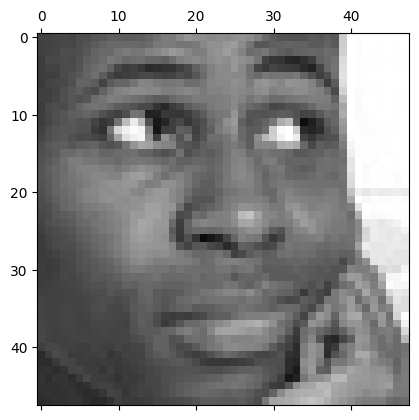

In [52]:
plt.matshow(X[8])

In [53]:
values=np.unique(y,return_counts=True)
values

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171], dtype=int64))

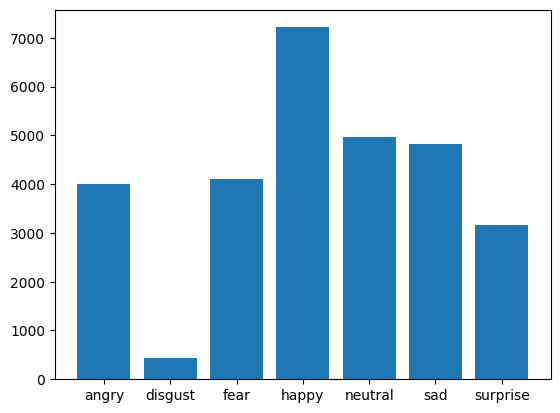

In [54]:
plt.bar(emotions,values[1])
plt.show()